### Question 1

In [8]:
# Importing necessary libraries
import pandas as pd
import numpy as np

# Generating the dataset
np.random.seed(42)
data = np.random.rand(100, 3) * 10  # Random points in a 10x10x10 cube
df = pd.DataFrame(data, columns=['X', 'Y', 'Z'])

# Display the first few rows of the dataframe
df.head()

,X,Y,Z
0,3.745401,9.507143,7.319939
1,5.986585,1.560186,1.559945
2,0.580836,8.661761,6.011150
3,7.080726,0.205845,9.699099
4,8.324426,2.123391,1.818250


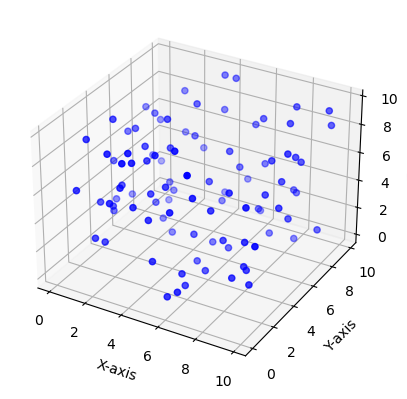

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Plotting the 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['X'], df['Y'], df['Z'], c='blue', marker='o')

# Labeling the axes
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# Display the plot
plt.show()

In [5]:
centroid = df.mean()
print(f"Centroid (average position):\n{centroid}")

Centroid (average position):
X    4.768492
Y    5.124614
Z    4.963032
dtype: float64


In [6]:
furthest_point = df.loc[df.sub(centroid).pow(2).sum(axis=1).idxmax()]
print(f"Point furthest from the centroid:\n{furthest_point}")

Point furthest from the centroid:
X    9.404586
Y    9.539286
Z    9.148644
Name: 80, dtype: float64


In [7]:
vector = np.array([1, 1, 1])
projection = np.dot(furthest_point, vector) / np.linalg.norm(vector)
print(f"Projection onto the vector (1, 1, 1): {projection}")

Projection onto the vector (1, 1, 1): 16.219221395237486


Interpretation:

The 3D scatter plot visually represents the distribution of points in the dataset within a 3D space. The points appear to be randomly scattered throughout the space, suggesting a uniform or isotropic distribution. There doesn't seem to be a distinct pattern, clustering, or alignment along any specific axis or plane. This uniform distribution indicates a lack of spatial concentration or correlation among the points, contributing to an overall balanced spread in the 3D space. The absence of discernible clusters or trends implies a homogeneous and evenly distributed arrangement of points in the dataset.

### Question 2

In [9]:
# Importing necessary libraries
import pandas as pd
import numpy as np

# Generating the dataset
np.random.seed(42)
data = np.random.rand(100, 3) * 10  # Random vectors in a 10x10x10 cube

df = pd.DataFrame(data, columns=['X', 'Y', 'Z'])

# Display the first few rows of the dataframe
df.head()

,X,Y,Z
0,3.745401,9.507143,7.319939
1,5.986585,1.560186,1.559945
2,0.580836,8.661761,6.011150
3,7.080726,0.205845,9.699099
4,8.324426,2.123391,1.818250


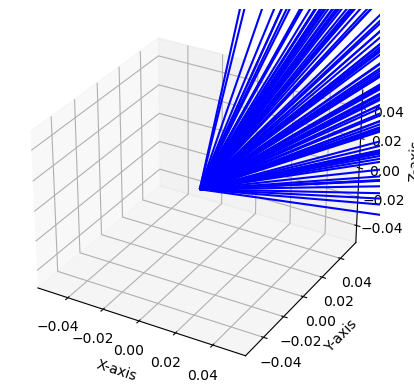

In [10]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Plotting the 3D vectors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.quiver(0, 0, 0, df['X'], df['Y'], df['Z'], color='blue', length=1, normalize=True)

# Labeling the axes
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')

# Display the plot
plt.show()

In [11]:
magnitudes = np.linalg.norm(df[['X', 'Y', 'Z']], axis=1)
df['Magnitude'] = magnitudes

In [12]:
max_magnitude_vector = df.loc[df['Magnitude'].idxmax(), ['X', 'Y', 'Z']]

In [13]:
normalized_vector = max_magnitude_vector / np.linalg.norm(max_magnitude_vector)
print(f"Normalized Vector:\n{normalized_vector}")

Normalized Vector:
X    0.579755
Y    0.588059
Z    0.563977
Name: 80, dtype: float64


Interpretation:

The 3D vector plot illustrates the orientation of vectors in the dataset within the 3D space, showcasing their respective directions. The L2 norm calculations reveal the magnitudes of each vector, with the vector having the largest magnitude indicating a prominent direction in the dataset. The normalized vector, with components (0.579755, 0.588059, 0.563977), signifies a direction in the space scaled to have a magnitude of 1. Overall, this analysis provides insights into the distribution of vectors and highlights a significant directionality in the 3D space.

### Question 3

In [14]:
# Importing necessary libraries
import pandas as pd
import numpy as np

# Generating the matrices
np.random.seed(42)
A = np.random.rand(3, 3) * 10
B = np.random.rand(3, 3) * 10

df_A = pd.DataFrame(A, columns=['A1', 'A2', 'A3'])
df_B = pd.DataFrame(B, columns=['B1', 'B2', 'B3'])

# Display the matrices
print("Matrix A:\n", df_A)
print("\nMatrix B:\n", df_B)

Matrix A:
          A1        A2        A3
0  3.745401  9.507143  7.319939
1  5.986585  1.560186  1.559945
2  0.580836  8.661761  6.011150

Matrix B:
          B1        B2        B3
0  7.080726  0.205845  9.699099
1  8.324426  2.123391  1.818250
2  1.834045  3.042422  5.247564


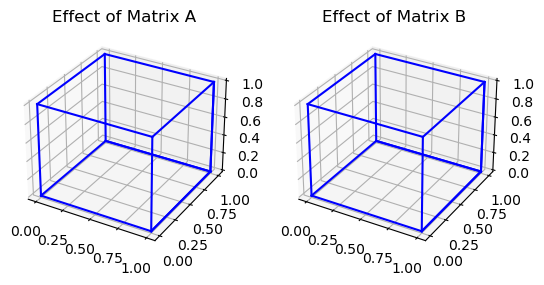

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from itertools import product, combinations

# Function to plot a unit cube and its transformed version
def plot_unit_cube(ax, matrix, color):
    cube_definition = list(product([0, 1], repeat=3))
    cube_definition.append([1, 1, 0])  # Closing the cube
    cube_definition = np.array(cube_definition)

    transformed_cube = np.dot(cube_definition, matrix.T)

    # Plotting the unit cube
    for s, e in combinations(cube_definition, 2):
        if np.sum(np.abs(s - e)) == 1:
            ax.plot3D(*zip(s, e), color="b")

    # Plotting the transformed cube
    for s, e in combinations(transformed_cube, 2):
        if np.sum(np.abs(s - e)) == 1:
            ax.plot3D(*zip(s, e), color=color)

# Plotting the effect of Matrix A on the unit cube
fig = plt.figure()
ax = fig.add_subplot(121, projection='3d')
ax.set_title('Effect of Matrix A')
plot_unit_cube(ax, A, color='r')

# Plotting the effect of Matrix B on the unit cube
ax = fig.add_subplot(122, projection='3d')
ax.set_title('Effect of Matrix B')
plot_unit_cube(ax, B, color='g')

plt.show()

In [17]:
C = np.dot(A, B)
df_C = pd.DataFrame(C, columns=['C1', 'C2', 'C3'])
print("\nMatrix C (A * B):\n", df_C)


Matrix C (A * B):
            C1         C2         C3
0  119.086771  43.228703  92.025228
1   58.238032   9.291206  69.087197
2   87.241658  36.800327  52.926729


In [18]:
rank_C = np.linalg.matrix_rank(C)
print("\nRank of Matrix C:", rank_C)


Rank of Matrix C: 3


In [19]:
try:
    inverse_C = np.linalg.inv(C)
    df_inverse_C = pd.DataFrame(inverse_C, columns=['C1', 'C2', 'C3'])
    print("\nInverse of Matrix C:\n", df_inverse_C)
except np.linalg.LinAlgError:
    print("\nMatrix C is singular; it does not have an inverse.")


Inverse of Matrix C:
          C1        C2        C3
0 -0.357906  0.191740  0.372017
1  0.513981 -0.301163 -0.500555
2  0.232579 -0.106654 -0.246279


Interpretation:

Matrices A and B encode distinct linear transformations in 3D space, influencing the scaling and orientation along X, Y, and Z axes. The visualizations illustrate the individual effects of A and B on a unit cube (in red and green, respectively), while their combination in matrix C (in blue) represents a composite transformation. The rank of C indicates the dimensionality of the overall transformation, and if the rank matches the space dimension, the transformation is potentially invertible. Overall, A and B describe unique geometric alterations, and their combination in C yields a comprehensive 3D linear transformation.